# **load Frack data**
---
Datos relacionados a las medidas de teoría de grafos 
Clustering, Global, Path Length y Strength:

*Resultados_new_medidas_grafos_giga_norm_2__v1_ (conectividad sin umbralizar)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os, sys
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.model_selection import ShuffleSplit, cross_val_score
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import tensorflow as tf
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score
from sklearn.metrics import r2_score
from sklearn import linear_model
from scipy.stats import linregress
from scipy.stats import spearmanr
from scipy.stats import pearsonr

from sklearn.base import  BaseEstimator, TransformerMixin, ClassifierMixin
from sklearn.model_selection import StratifiedShuffleSplit
from scipy.signal import butter, filtfilt, lfilter, welch, lfilter_zi, stft
import pandas as pd

from sklearn.model_selection import LeaveOneOut
import pickle

In [ ]:
FILEID = "1tIAIAymOYi3gK7HtPoGi0Y6X6lpo-H_3"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O Data_rest_r0.zip && rm -rf /tmp/cookies.txt
!dir
!unzip Data_rest_r0.zip

--2021-04-13 16:46:01--  https://docs.google.com/uc?export=download&confirm=2vxs&id=1tIAIAymOYi3gK7HtPoGi0Y6X6lpo-H_3
Resolving docs.google.com (docs.google.com)... 64.233.166.113, 64.233.166.100, 64.233.166.139, ...
Connecting to docs.google.com (docs.google.com)|64.233.166.113|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-04-b0-docs.googleusercontent.com/docs/securesc/irnd01a84nuv7von798ue94u8euo59gs/et4c93cea2ldlahrr0dqc53c2e6cmbfv/1618332300000/13064322042220169363/10279972375352057334Z/1tIAIAymOYi3gK7HtPoGi0Y6X6lpo-H_3?e=download [following]
--2021-04-13 16:46:01--  https://doc-04-b0-docs.googleusercontent.com/docs/securesc/irnd01a84nuv7von798ue94u8euo59gs/et4c93cea2ldlahrr0dqc53c2e6cmbfv/1618332300000/13064322042220169363/10279972375352057334Z/1tIAIAymOYi3gK7HtPoGi0Y6X6lpo-H_3?e=download
Resolving doc-04-b0-docs.googleusercontent.com (doc-04-b0-docs.googleusercontent.com)... 74.125.140.132, 2a00:1450:400c:c08::84
Connecting

In [ ]:
FILEID = "1eBcVURZP4pGR4GGQGvnCpc7RkWQUgBZL"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O Resultados_new_medidas_grafos_giga_norm_2__v1_.zip && rm -rf /tmp/cookies.txt
!dir
!unzip Resultados_new_medidas_grafos_giga_norm_2__v1_.zip

--2021-04-13 16:46:20--  https://docs.google.com/uc?export=download&confirm=&id=1eBcVURZP4pGR4GGQGvnCpc7RkWQUgBZL
Resolving docs.google.com (docs.google.com)... 64.233.166.138, 64.233.166.102, 64.233.166.139, ...
Connecting to docs.google.com (docs.google.com)|64.233.166.138|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-08-68-docs.googleusercontent.com/docs/securesc/c6crkmrjags11oje4bqiavc5n2ubsm4g/5d7fem32p55kt104r1bd990sovbfgs8o/1618332375000/17600740636788319470/16139449342298390269Z/1eBcVURZP4pGR4GGQGvnCpc7RkWQUgBZL?e=download [following]
--2021-04-13 16:46:20--  https://doc-08-68-docs.googleusercontent.com/docs/securesc/c6crkmrjags11oje4bqiavc5n2ubsm4g/5d7fem32p55kt104r1bd990sovbfgs8o/1618332375000/17600740636788319470/16139449342298390269Z/1eBcVURZP4pGR4GGQGvnCpc7RkWQUgBZL?e=download
Resolving doc-08-68-docs.googleusercontent.com (doc-08-68-docs.googleusercontent.com)... 74.125.140.132, 2a00:1450:400c:c08::84
Connecting to 

In [ ]:
import os, sys
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.model_selection import ShuffleSplit, cross_val_score
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import tensorflow as tf
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score
from sklearn.metrics import r2_score
from sklearn import linear_model
from scipy.stats import linregress
from scipy.stats import spearmanr, pearsonr


from sklearn.base import  BaseEstimator, TransformerMixin, ClassifierMixin
from sklearn.model_selection import StratifiedShuffleSplit
from scipy.signal import butter, filtfilt, lfilter, welch, lfilter_zi, stft
import pandas as pd

from sklearn.model_selection import LeaveOneOut
import pickle

In [ ]:
seed = 100
np.random.seed(seed)
tf.random.set_seed(seed)
class SMRfeat(BaseEstimator, TransformerMixin):
  def __init__(self):
    self

  def scalerlist(self,Xfull):
     self.scaler = len(Xfull)*[None]
     for i in range(len(Xfull)):
        self.scaler[i] = StandardScaler()
        Xfull[i] = self.scaler[i].fit_transform(Xfull[i])
     return Xfull


  def fit(self,Xepochs,*_):
      
      Xfull = [Xepochs[:,:,i] for i in range(Xepochs.shape[2])]

      self.scalerlist(Xfull)
      return 

  def transform(self,Xepochs,*_):   
      
          
      
      Xfull = [Xepochs[:,:,i] for i in range(Xepochs.shape[2])]

      
      for i in range(len(Xfull)):
         self.scaler[i] = StandardScaler()
         Xfull[i] = self.scaler[i].fit_transform(Xfull[i])
      return Xfull

  def fit_transform(self,Xepochs,*_):
      self.fit(Xepochs)
      return self.transform(Xepochs)   
class SMRDNN(BaseEstimator, TransformerMixin):
  def __init__(self,epochs=200,batch_size=32,learning_rate=1e-3,optimizer='Adam',
                l1_param=1e-3,l2_param=1e-3,validation_split=0.2,verbose=0,fs=512,scalex=1,scaley=1):
        self.epochs = epochs
        self.scalex = scalex
        self.scaley = scaley
        self.batch_size = batch_size
        self.learning_rate=learning_rate 
        self.l1_param=l1_param 
        self.l2_param=l2_param
        self.validation_split = validation_split
        self.verbose = verbose
        self.optimizer = optimizer
        self.fs=fs
  
  def fit(self,X,y,*_):

    #entrenar predictor SMRDNN
    if self.optimizer == "Adam":
        opt = tf.keras.optimizers.Adam(learning_rate=self.learning_rate)
    elif self.optimizer == "SGD":
        opt = tf.keras.optimizers.SGD(learning_rate=self.learning_rate)
    else:
        opt=self.optimizer
    
    tf.keras.backend.clear_session()
    seed = 100
    np.random.seed(seed)
    tf.random.set_seed(seed)

    Q1f = 1.5
    Qff = 0.5
    l1 = self.l1_param
    l2 = self.l2_param
    act1 = 'tanh'
    actf = 'tanh'
    inputs = len(X)*[None]
    hiddens = len(X)*[None]
    winitializer = tf.keras.initializers.GlorotNormal(seed=seed)
    binitializer = "zeros"
    #h1
    for i in range(len(X)):
        inputs[i] = tf.keras.layers.Input(shape=(X[i].shape[1]), name='in_'+str(i))
        hiddens[i] = tf.keras.layers.Dense(int(X[i].shape[1]*Q1f),activation=act1,kernel_regularizer=tf.keras.regularizers.l1_l2(l1=l1,l2=l2),kernel_initializer=winitializer,bias_initializer=binitializer,name='h1_'+str(i))(inputs[i])

    #concat
    concat = tf.keras.layers.concatenate(hiddens,name='concat')
    #concat = tf.keras.layers.concatenate([h1c3psd,h1c4psd],name='concat')
    Qh = np.sum([X[i].shape[1]*Q1f for i in range(len(X))])
    
    hfi = tf.keras.layers.Dense(Qh*Qff,activation=actf,kernel_regularizer=tf.keras.regularizers.l1_l2(l1=l1,l2=l2),
                              kernel_initializer=winitializer,
                              bias_initializer=binitializer,name='hfi')(concat)

    #cla
    output_c = tf.keras.layers.Dense(1,activation="linear",kernel_initializer=winitializer, bias_initializer=binitializer,
                                    kernel_regularizer=tf.keras.regularizers.l1_l2(l1=l1,l2=l2),name='outc')(hfi) 
    #input_full = [ic3_tuz,ic4_tuz,ic3_tbz,ic4_tbz,ic3_psdz,ic4_psdz]
    self.model_fun = tf.keras.Model(inputs=inputs,outputs=[output_c])

    self.model_fun.compile(loss=tf.keras.losses.mae,#self.custom_loss(),
              optimizer=opt) #f1, precision, recall, crossentropy

    self.history = self.model_fun.fit(x=X, y=y,verbose=self.verbose,
                        epochs=self.epochs,batch_size=self.batch_size,validation_split=self.validation_split)
    self.plot_history_acc_w()
  def predict(self, X, *_):
    return  self.model_fun.predict(X)

  def fit_predict(self,X,y,*_):
      self.fit(X,y)
      return  self.predict(X)
  def plot_history_acc_w(self):
      hpd = pd.DataFrame(self.history.history)
      #hpd[['loss','val_loss']].plot()
      hpd.plot()
      plt.show()
      return

In [ ]:
grafos=loadmat('Resultados_new_medidas_grafos_giga_norm_2_v1_.mat')
grafos.keys()

dict_keys(['__header__', '__version__', '__globals__', 'Clustering', 'Global_Eff', 'Path_Len', 'SS', 'Strength'])

In [ ]:
data = loadmat('Data_resting_C3andC4.mat')


array([[100.        , 100.        , 100.        , 100.        ],
       [100.        , 100.        , 100.        , 100.        ],
       [ 98.57142857,  98.57142857,  97.14285714,  97.14285714],
       [ 98.57142857,  98.57142857,  96.9047619 ,  95.71428571],
       [100.        , 100.        ,  97.14285714,  94.28571429],
       [ 98.57142857,  98.57142857,  97.14285714,  92.85714286],
       [ 97.14285714,  97.14285714,  94.28571429,  91.42857143],
       [ 91.42857143,  91.42857143,  94.28571429,  91.42857143],
       [ 97.14285714,  95.71428571,  92.85714286,  87.14285714],
       [ 94.28571429,  91.42857143,  91.42857143,  88.57142857],
       [ 89.76190476,  88.33333333,  88.33333333,  88.57142857],
       [ 86.        ,  90.        ,  95.        ,  88.33333333],
       [ 86.9047619 ,  87.14285714,  91.42857143,  85.71428571],
       [100.        ,  85.71428571,  88.33333333,  84.04761905],
       [ 87.14285714,  87.14285714,  86.9047619 ,  84.28571429],
       [ 88.0952381 ,  85

# *Clustering*

In [ ]:
grafos=loadmat('Resultados_new_medidas_grafos_giga_norm_2_v1_.mat')
graf=grafos['Clustering']
#crear tensor (sujeto x canales x tiempo)
indx = loadmat('Means_giga_mayo.mat')['S1'].ravel()
tipos = [2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 1, 1, 1, 1 , 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1]
newindx = indx #usar este para no seleccionar tipos
# newindx = []
# for i in range(len(tipos)):
#   if tipos[i]==2 or tipos[i]==0:
#     newindx += [indx[i]]


xtensor = []
 
for i in newindx:
  if i>= 29 and i<34:
    subjs= graf[i-2,:,:].T
  elif i>=34:
    subjs= graf[i-3,:,:].T
  else:
    subjs= graf[i-1,:,:].T

  try:
    xtensor+=[subjs]
  except:
    print('s'+str(i+1))

xtensor= np.asarray(xtensor)
xtensor.shape


(50, 35, 2)

# Nueva sección

In [ ]:
## nueva celda, poner en todas
data = loadmat('Data_resting_C3andC4.mat')

mea = data['means']
sc_ma = StandardScaler()
acc_m = mea.mean(axis=1)

ma_z = sc_ma.fit_transform(mea)
 
zpca = ma_z[:,3].reshape(-1,1)

In [ ]:
a=xtensor
steps = [('smrfeat', SMRfeat()), 
          ('smrdnn', SMRDNN(verbose=1,epochs=200,l1_param=1e-3,l2_param=1e-3,validation_split=0.1))]

pipeline = Pipeline(steps)
#ypred = pipeline.fit_predict(X_raw,zpca)
ypred = cross_val_predict(pipeline,a,zpca,cv=LeaveOneOut(),verbose=10,n_jobs=-1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   14.3s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   35.1s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   49.6s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  3.0min finished


mean_squared_error 0.5101159939326899
mean_absolute_error 0.44820454498788576
mean_absolute_percentage_error 44.82045449878858
-0.8303022801843972 8.887115929694132e-14


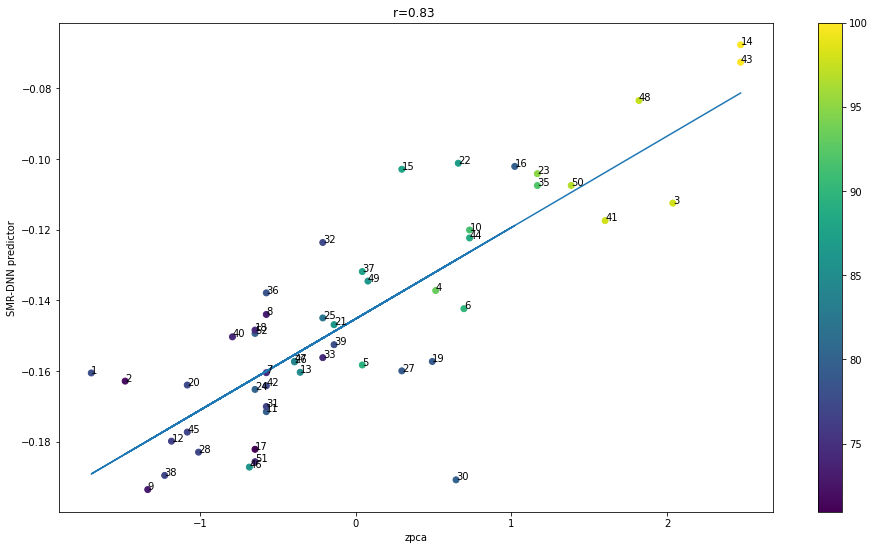

In [ ]:
indx = loadmat('Means_giga_mayo.mat')['S1'].ravel()
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler

scm = MinMaxScaler()
indx = loadmat('Means_giga_mayo.mat')['S1'].ravel()
print('mean_squared_error', np.sqrt(mean_squared_error(scm.fit_transform(zpca), scm.fit_transform(ypred))))
print('mean_absolute_error', mean_absolute_error(scm.fit_transform(zpca), scm.fit_transform(ypred)))
print('mean_absolute_percentage_error', mean_absolute_error(scm.fit_transform(zpca), scm.fit_transform(ypred))*100)

_, _, r_value, p_value, _ = linregress(zpca.reshape(-1),ypred.reshape(-1))
print( r_value ,p_value )

regr = linear_model.LinearRegression()
regr.fit(zpca.reshape(-1,1),ypred.reshape(-1,1))
lrpred = regr.predict(zpca.reshape(-1,1))
plt.figure(figsize=(16,9))
plt.plot(zpca,-1*lrpred)
plt.scatter(zpca,-1*ypred,c=acc_m)
for i in range(zpca.shape[0]):
    plt.text(zpca[i],-1*ypred[i],indx[i])
plt.xlabel('zpca')
plt.ylabel('SMR-DNN predictor')
plt.title('r=%.2f '%abs(r_value))
plt.colorbar()
plt.show()

## por rendimiento de sujeto

In [ ]:
grafos=loadmat('Resultados_new_medidas_grafos_giga_norm_2_v1_.mat')
graf=grafos['Clustering']
#crear tensor (sujeto x canales x tiempo)
indx = loadmat('Means_giga_mayo.mat')['S1'].ravel()

#newindx = indx #usar este para no seleccionar tipos
#este segmento es para elegir la casificacion de cada sujeto 
tipos = [2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 1, 1, 1, 1 , 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1]
        
newindx = []
for i in range(len(tipos)):
  if tipos[i]==1 or tipos[i]==1:
    newindx += [indx[i]]
print(len(newindx))

data = loadmat('Data_resting_C3andC4.mat')

mea = data['means']

newmea = []
for i in range(len(tipos)):
  if tipos[i]==1 or tipos[i]==1:
    newmea += [mea[i,:]]
len(newmea)
newmea= np.array(newmea)
print(newmea.shape)
###########################################

xtensor = []
 
for i in newindx:
  if i>= 29 and i<34:
    subjs= graf[i-2,:,:].T
  elif i>=34:
    subjs= graf[i-3,:,:].T
  else:
    subjs= graf[i-1,:,:].T

  try:
    xtensor+=[subjs]
  except:
    print('s'+str(i+1))

xtensor= np.asarray(xtensor)
xtensor.shape


27
(27, 4)


(27, 35, 2)

In [ ]:
## nueva celda, poner en todas
data = loadmat('Data_resting_C3andC4.mat')


# newmea = []
# for i in range(len(tipos)):
#   if tipos[i]==0 or tipos[i]==1:
#     newmea += [mea[i,:]]
# len(newmea)
# newmea= np.array(newmea)


mea = newmea#data['means']
sc_ma = StandardScaler()
acc_m = mea.mean(axis=1)

ma_z = sc_ma.fit_transform(mea)
 
zpca = ma_z[:,3].reshape(-1,1)
zpca.shape

(27, 1)

In [ ]:
a=xtensor
steps = [('smrfeat', SMRfeat()), 
          ('smrdnn', SMRDNN(verbose=1,epochs=200,l1_param=1e-3,l2_param=1e-3,validation_split=0.1))]

pipeline = Pipeline(steps)
#ypred = pipeline.fit_predict(X_raw,zpca)
ypred = cross_val_predict(pipeline,a,zpca,cv=LeaveOneOut(),verbose=10,n_jobs=-1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   20.2s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   28.8s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   53.5s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:  2.1min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:  2.1min finished


mean_squared_error 0.49690568632225385
mean_absolute_error 0.4151436910158321
mean_absolute_percentage_error 41.514369101583206
-0.8572596922866702 1.1288144917581247e-08


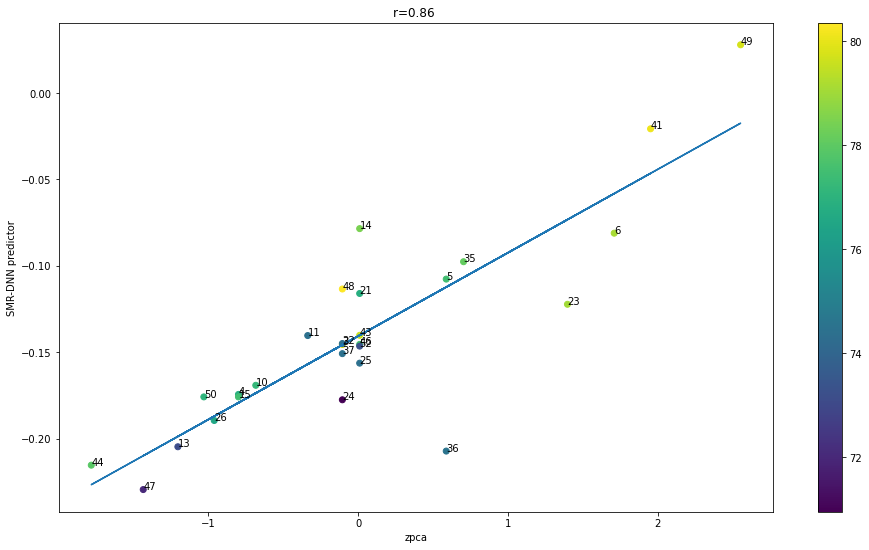

In [ ]:
indx = loadmat('Means_giga_mayo.mat')['S1'].ravel()
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler

scm = MinMaxScaler()
indx = loadmat('Means_giga_mayo.mat')['S1'].ravel()
print('mean_squared_error', np.sqrt(mean_squared_error(scm.fit_transform(zpca), scm.fit_transform(ypred))))
print('mean_absolute_error', mean_absolute_error(scm.fit_transform(zpca), scm.fit_transform(ypred)))
print('mean_absolute_percentage_error', mean_absolute_error(scm.fit_transform(zpca), scm.fit_transform(ypred))*100)

_, _, r_value, p_value, _ = linregress(zpca.reshape(-1),ypred.reshape(-1))
print( r_value ,p_value )

regr = linear_model.LinearRegression()
regr.fit(zpca.reshape(-1,1),ypred.reshape(-1,1))
lrpred = regr.predict(zpca.reshape(-1,1))
plt.figure(figsize=(16,9))
plt.plot(zpca,-1*lrpred)
plt.scatter(zpca,-1*ypred,c=acc_m)
for i in range(zpca.shape[0]):
    plt.text(zpca[i],-1*ypred[i],indx[i])
plt.xlabel('zpca')
plt.ylabel('SMR-DNN predictor')
plt.title('r=%.2f '%abs(r_value))
plt.colorbar()
plt.show()

# **Global_Eff**

In [ ]:
grafos=loadmat('Resultados_new_medidas_grafos_giga_norm_2_v1_.mat')
graf=grafos['Global_Eff']
#crear tensor (sujeto x canales x tiempo)
indx = loadmat('Means_giga_mayo.mat')['S1'].ravel()
tipos = [2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 1, 1, 1, 1 , 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1]
newindx = indx #usar este para no seleccionar tipos
# newindx = []
# for i in range(len(tipos)):
#   if tipos[i]==2 or tipos[i]==0:
#     newindx += [indx[i]]


xtensor = []
 
for i in newindx:
  if i>= 29 and i<34:
    subjs= graf[i-2,:,:].T
  elif i>=34:
    subjs= graf[i-3,:,:].T
  else:
    subjs= graf[i-1,:,:].T

  try:
    xtensor+=[subjs]
  except:
    print('s'+str(i+1))

xtensor= np.asarray(xtensor)
xtensor.shape


(50, 35, 2)

In [ ]:
## nueva celda, poner en todas
data = loadmat('Data_resting_C3andC4.mat')

mea = data['means']
sc_ma = StandardScaler()
acc_m = mea.mean(axis=1)

ma_z = sc_ma.fit_transform(mea)
 
zpca = ma_z[:,3].reshape(-1,1)

In [ ]:
a=xtensor
steps = [('smrfeat', SMRfeat()), 
          ('smrdnn', SMRDNN(verbose=1,epochs=200,l1_param=1e-3,l2_param=1e-3,validation_split=0.1))]

pipeline = Pipeline(steps)
#ypred = pipeline.fit_predict(X_raw,zpca)
ypred = cross_val_predict(pipeline,a,zpca,cv=LeaveOneOut(),verbose=10,n_jobs=-1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   13.7s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   21.7s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   44.4s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  3.3min finished


mean_squared_error 0.5050748198005143
mean_absolute_error 0.4480360509478527
mean_absolute_percentage_error 44.80360509478527
-0.7058084056759624 1.0362378650458661e-08
(-0.7058084056759628, 1.036237865045835e-08)
SpearmanrResult(correlation=-0.6527418053833753, pvalue=2.7917043074441756e-07)


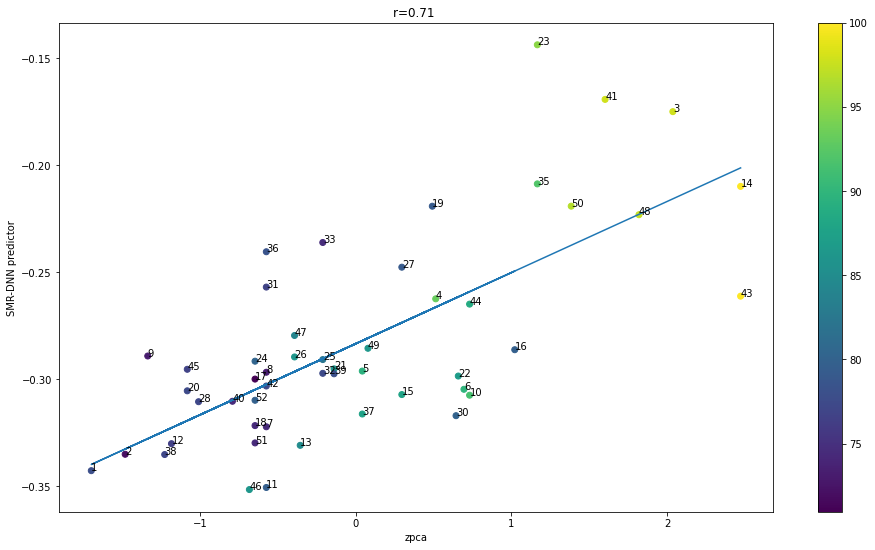

In [ ]:
indx = loadmat('Means_giga_mayo.mat')['S1'].ravel()

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler

scm = MinMaxScaler()
indx = loadmat('Means_giga_mayo.mat')['S1'].ravel()
print('mean_squared_error', np.sqrt(mean_squared_error(scm.fit_transform(zpca), scm.fit_transform(ypred))))
print('mean_absolute_error', mean_absolute_error(scm.fit_transform(zpca), scm.fit_transform(ypred)))
print('mean_absolute_percentage_error', mean_absolute_error(scm.fit_transform(zpca), scm.fit_transform(ypred))*100)


_, _, r_value, p_value, _ = linregress(zpca.reshape(-1),ypred.reshape(-1))
print( r_value ,p_value )
print(pearsonr(zpca.reshape(-1), ypred.reshape(-1)))
print(spearmanr(zpca.reshape(-1), ypred.reshape(-1)))

regr = linear_model.LinearRegression()
regr.fit(zpca.reshape(-1,1),ypred.reshape(-1,1))
lrpred = regr.predict(zpca.reshape(-1,1))
plt.figure(figsize=(16,9))
plt.plot(zpca,-1*lrpred)
plt.scatter(zpca,-1*ypred,c=acc_m)
for i in range(zpca.shape[0]):
    plt.text(zpca[i],-1*ypred[i],indx[i])
plt.xlabel('zpca')
plt.ylabel('SMR-DNN predictor')
plt.title('r=%.2f '%abs(r_value))
plt.colorbar()
plt.show()

## por rendimiento de sujeto

In [ ]:
grafos=loadmat('Resultados_new_medidas_grafos_giga_norm_2_v1_.mat')
graf=grafos['Global_Eff']
#crear tensor (sujeto x canales x tiempo)
indx = loadmat('Means_giga_mayo.mat')['S1'].ravel()

#newindx = indx #usar este para no seleccionar tipos
#este segmento es para elegir la casificacion de cada sujeto 
tipos = [2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 1, 1, 1, 1 , 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1]
        
newindx = []
for i in range(len(tipos)):
  if tipos[i]==1 or tipos[i]==1:
    newindx += [indx[i]]
print(len(newindx))

data = loadmat('Data_resting_C3andC4.mat')

mea = data['means']

newmea = []
for i in range(len(tipos)):
  if tipos[i]==1 or tipos[i]==1:
    newmea += [mea[i,:]]
len(newmea)
newmea= np.array(newmea)
print(newmea.shape)
###########################################

xtensor = []
 
for i in newindx:
  if i>= 29 and i<34:
    subjs= graf[i-2,:,:].T
  elif i>=34:
    subjs= graf[i-3,:,:].T
  else:
    subjs= graf[i-1,:,:].T

  try:
    xtensor+=[subjs]
  except:
    print('s'+str(i+1))

xtensor= np.asarray(xtensor)
xtensor.shape


27
(27, 4)


(27, 35, 2)

In [ ]:
## nueva celda, poner en todas
data = loadmat('Data_resting_C3andC4.mat')


# newmea = []
# for i in range(len(tipos)):
#   if tipos[i]==0 or tipos[i]==2:
#     newmea += [mea[i,:]]
# len(newmea)
# newmea= np.array(newmea)


mea = newmea#data['means']
sc_ma = StandardScaler()
acc_m = mea.mean(axis=1)

ma_z = sc_ma.fit_transform(mea)
 
zpca = ma_z[:,3].reshape(-1,1)
zpca.shape

(27, 1)

In [ ]:
a=xtensor
steps = [('smrfeat', SMRfeat()), 
          ('smrdnn', SMRDNN(verbose=1,epochs=200,l1_param=1e-3,l2_param=1e-3,validation_split=0.1))]

pipeline = Pipeline(steps)
#ypred = pipeline.fit_predict(X_raw,zpca)
ypred = cross_val_predict(pipeline,a,zpca,cv=LeaveOneOut(),verbose=10,n_jobs=-1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   16.4s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   40.8s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   57.2s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:  1.8min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:  1.8min finished


mean_squared_error 0.45683490402437693
mean_absolute_error 0.36008956780551393
mean_absolute_percentage_error 36.008956780551394
-0.7916616382289601 8.735112495287184e-07


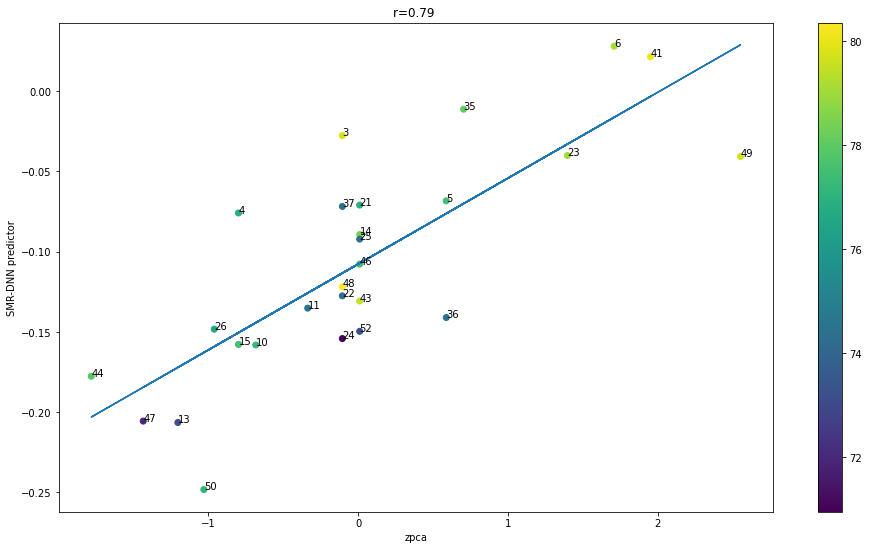

In [ ]:
indx = loadmat('Means_giga_mayo.mat')['S1'].ravel()
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler

scm = MinMaxScaler()

print('mean_squared_error', np.sqrt(mean_squared_error(scm.fit_transform(zpca), scm.fit_transform(ypred))))
print('mean_absolute_error', mean_absolute_error(scm.fit_transform(zpca), scm.fit_transform(ypred)))
print('mean_absolute_percentage_error', mean_absolute_error(scm.fit_transform(zpca), scm.fit_transform(ypred))*100)

_, _, r_value, p_value, _ = linregress(zpca.reshape(-1),ypred.reshape(-1))
print( r_value ,p_value )

regr = linear_model.LinearRegression()
regr.fit(zpca.reshape(-1,1),ypred.reshape(-1,1))
lrpred = regr.predict(zpca.reshape(-1,1))
plt.figure(figsize=(16,9))
plt.plot(zpca,-1*lrpred)
plt.scatter(zpca,-1*ypred,c=acc_m)
for i in range(zpca.shape[0]):
    plt.text(zpca[i],-1*ypred[i],indx[i])
plt.xlabel('zpca')
plt.ylabel('SMR-DNN predictor')
plt.title('r=%.2f '%abs(r_value))
plt.colorbar()
plt.show()

# **Path_Len**

In [ ]:
grafos=loadmat('Resultados_new_medidas_grafos_giga_norm_2_v1_.mat')
graf=grafos['Path_Len']
#crear tensor (sujeto x canales x tiempo)
indx = loadmat('Means_giga_mayo.mat')['S1'].ravel()
tipos = [2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 1, 1, 1, 1 , 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1]
newindx = indx #usar este para no seleccionar tipos
# newindx = []
# for i in range(len(tipos)):
#   if tipos[i]==2 or tipos[i]==0:
#     newindx += [indx[i]]


xtensor = []
 
for i in newindx:
  if i>= 29 and i<34:
    subjs= graf[i-2,:,:].T
  elif i>=34:
    subjs= graf[i-3,:,:].T
  else:
    subjs= graf[i-1,:,:].T

  try:
    xtensor+=[subjs]
  except:
    print('s'+str(i+1))

xtensor= np.asarray(xtensor)
xtensor.shape


(50, 35, 2)

In [ ]:
## nueva celda, poner en todas
data = loadmat('Data_resting_C3andC4.mat')

mea = data['means']
sc_ma = StandardScaler()
acc_m = mea.mean(axis=1)

ma_z = sc_ma.fit_transform(mea)
 
zpca = ma_z[:,3].reshape(-1,1)

In [ ]:
a=xtensor
steps = [('smrfeat', SMRfeat()), 
          ('smrdnn', SMRDNN(verbose=1,epochs=200,l1_param=1e-3,l2_param=1e-3,validation_split=0.1))]

pipeline = Pipeline(steps)
#ypred = pipeline.fit_predict(X_raw,zpca)
ypred = cross_val_predict(pipeline,a,zpca,cv=LeaveOneOut(),verbose=10,n_jobs=-1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   15.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   37.2s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   52.3s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  3.2min finished


mean_squared_error 0.43109977254911824
mean_absolute_error 0.36889543680367254
mean_absolute_percentage_error 36.889543680367254
-0.6888808795733224 3.194306491050612e-08
(-0.6888808795733224, 3.194306491050627e-08)
SpearmanrResult(correlation=-0.7325437936685721, pvalue=1.4773940901614491e-09)


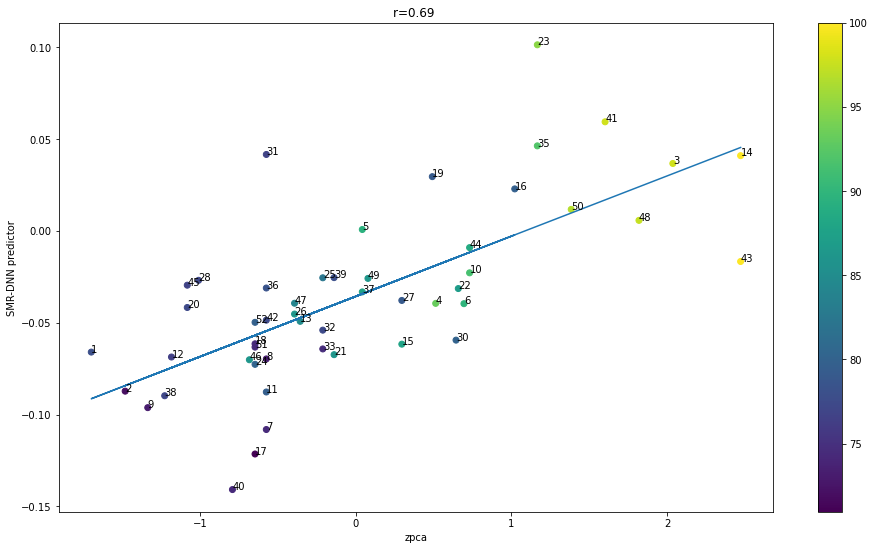

In [ ]:
indx = loadmat('Means_giga_mayo.mat')['S1'].ravel()

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler

scm = MinMaxScaler()
indx = loadmat('Means_giga_mayo.mat')['S1'].ravel()
print('mean_squared_error', np.sqrt(mean_squared_error(scm.fit_transform(zpca), scm.fit_transform(ypred))))
print('mean_absolute_error', mean_absolute_error(scm.fit_transform(zpca), scm.fit_transform(ypred)))
print('mean_absolute_percentage_error', mean_absolute_error(scm.fit_transform(zpca), scm.fit_transform(ypred))*100)

_, _, r_value, p_value, _ = linregress(zpca.reshape(-1),ypred.reshape(-1))
print( r_value ,p_value )
print(pearsonr(zpca.reshape(-1), ypred.reshape(-1)))
print(spearmanr(zpca.reshape(-1), ypred.reshape(-1)))

regr = linear_model.LinearRegression()
regr.fit(zpca.reshape(-1,1),ypred.reshape(-1,1))
lrpred = regr.predict(zpca.reshape(-1,1))
plt.figure(figsize=(16,9))
plt.plot(zpca,-1*lrpred)
plt.scatter(zpca,-1*ypred,c=acc_m)
for i in range(zpca.shape[0]):
    plt.text(zpca[i],-1*ypred[i],indx[i])
plt.xlabel('zpca')
plt.ylabel('SMR-DNN predictor')
plt.title('r=%.2f '%abs(r_value))
plt.colorbar()
plt.show()

## por rendimiento de sujeto

In [ ]:
grafos=loadmat('Resultados_new_medidas_grafos_giga_norm_2_v1_.mat')
graf=grafos['Path_Len']
#crear tensor (sujeto x canales x tiempo)
indx = loadmat('Means_giga_mayo.mat')['S1'].ravel()

#newindx = indx #usar este para no seleccionar tipos
#este segmento es para elegir la casificacion de cada sujeto 
tipos = [2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 1, 1, 1, 1 , 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1]
        
newindx = []
for i in range(len(tipos)):
  if tipos[i]==1 or tipos[i]==1:
    newindx += [indx[i]]
print(len(newindx))

data = loadmat('Data_resting_C3andC4.mat')

mea = data['means']

newmea = []
for i in range(len(tipos)):
  if tipos[i]==1 or tipos[i]==1:
    newmea += [mea[i,:]]
len(newmea)
newmea= np.array(newmea)
print(newmea.shape)
###########################################

xtensor = []
 
for i in newindx:
  if i>= 29 and i<34:
    subjs= graf[i-2,:,:].T
  elif i>=34:
    subjs= graf[i-3,:,:].T
  else:
    subjs= graf[i-1,:,:].T

  try:
    xtensor+=[subjs]
  except:
    print('s'+str(i+1))

xtensor= np.asarray(xtensor)
xtensor.shape


27
(27, 4)


(27, 35, 2)

In [ ]:
## nueva celda, poner en todas
data = loadmat('Data_resting_C3andC4.mat')


# newmea = []
# for i in range(len(tipos)):
#   if tipos[i]==0 or tipos[i]==2:
#     newmea += [mea[i,:]]
# len(newmea)
# newmea= np.array(newmea)


mea = newmea#data['means']
sc_ma = StandardScaler()
acc_m = mea.mean(axis=1)

ma_z = sc_ma.fit_transform(mea)
 
zpca = ma_z[:,3].reshape(-1,1)
zpca.shape

(27, 1)

In [ ]:
a=xtensor
steps = [('smrfeat', SMRfeat()), 
          ('smrdnn', SMRDNN(verbose=1,epochs=200,l1_param=1e-3,l2_param=1e-3,validation_split=0.1))]

pipeline = Pipeline(steps)
#ypred = pipeline.fit_predict(X_raw,zpca)
ypred = cross_val_predict(pipeline,a,zpca,cv=LeaveOneOut(),verbose=10,n_jobs=-1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   16.4s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   41.1s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   57.5s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:  1.9min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:  1.9min finished


mean_squared_error 0.4735156117913225
mean_absolute_error 0.3811053624800695
mean_absolute_percentage_error 38.11053624800695
-0.7568733593270209 4.902942096437156e-06


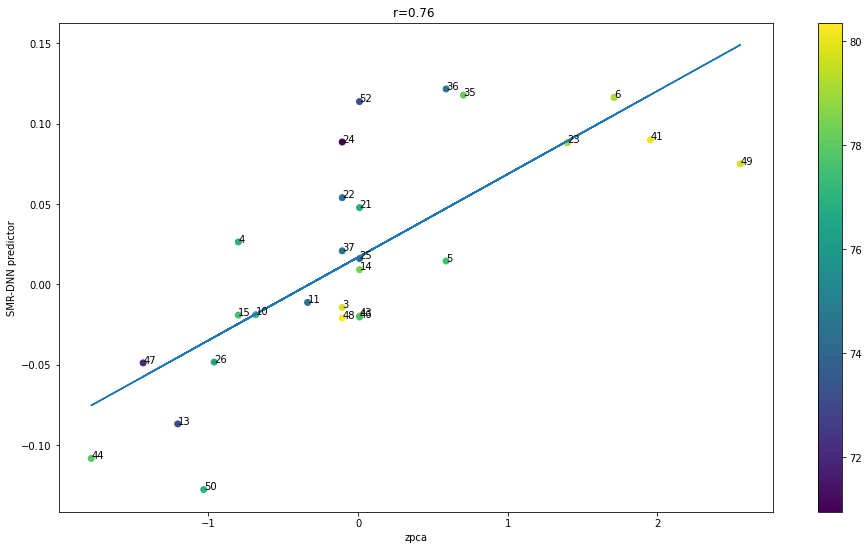

In [ ]:
indx =  loadmat('Means_giga_mayo.mat')['S1'].ravel()
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler

scm = MinMaxScaler()
print('mean_squared_error', np.sqrt(mean_squared_error(scm.fit_transform(zpca), scm.fit_transform(ypred))))
print('mean_absolute_error', mean_absolute_error(scm.fit_transform(zpca), scm.fit_transform(ypred)))
print('mean_absolute_percentage_error', mean_absolute_error(scm.fit_transform(zpca), scm.fit_transform(ypred))*100)

_, _, r_value, p_value, _ = linregress(zpca.reshape(-1),ypred.reshape(-1))
print( r_value ,p_value )

regr = linear_model.LinearRegression()
regr.fit(zpca.reshape(-1,1),ypred.reshape(-1,1))
lrpred = regr.predict(zpca.reshape(-1,1))
plt.figure(figsize=(16,9))
plt.plot(zpca,-1*lrpred)
plt.scatter(zpca,-1*ypred,c=acc_m)
for i in range(zpca.shape[0]):
    plt.text(zpca[i],-1*ypred[i],indx[i])
plt.xlabel('zpca')
plt.ylabel('SMR-DNN predictor')
plt.title('r=%.2f '%abs(r_value))
plt.colorbar()
plt.show()

# **Strength**

In [ ]:
grafos=loadmat('Resultados_new_medidas_grafos_giga_norm_2_v1_.mat')
graf=grafos['Strength']
#crear tensor (sujeto x canales x tiempo)
indx = loadmat('Means_giga_mayo.mat')['S1'].ravel()
tipos = [2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 1, 1, 1, 1 , 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1]
newindx = indx #usar este para no seleccionar tipos
# newindx = []
# for i in range(len(tipos)):
#   if tipos[i]==2 or tipos[i]==0:
#     newindx += [indx[i]]


xtensor = []
 
for i in newindx:
  if i>= 29 and i<34:
    subjs= graf[i-2,:,:].T
  elif i>=34:
    subjs= graf[i-3,:,:].T
  else:
    subjs= graf[i-1,:,:].T

  try:
    xtensor+=[subjs]
  except:
    print('s'+str(i+1))

xtensor= np.asarray(xtensor)
xtensor.shape


(50, 35, 2)

In [ ]:
## nueva celda, poner en todas
data = loadmat('Data_resting_C3andC4.mat')

mea = data['means']
sc_ma = StandardScaler()
acc_m = mea.mean(axis=1)

ma_z = sc_ma.fit_transform(mea)
 
zpca = ma_z[:,3].reshape(-1,1)

In [ ]:
a=xtensor
steps = [('smrfeat', SMRfeat()), 
          ('smrdnn', SMRDNN(verbose=1,epochs=200,l1_param=1e-3,l2_param=1e-3,validation_split=0.1))]

pipeline = Pipeline(steps)
#ypred = pipeline.fit_predict(X_raw,zpca)
ypred = cross_val_predict(pipeline,a,zpca,cv=LeaveOneOut(),verbose=10,n_jobs=-1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   15.7s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   39.0s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   54.9s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  3.2min finished


mean_squared_error 0.5085642273905913
mean_absolute_error 0.45210482111806444
mean_absolute_percentage_error 45.21048211180644
-0.8074875720244356 1.3938541652436958e-12
(-0.8074875720244353, 1.3938541652437399e-12)
SpearmanrResult(correlation=-0.7768194751207809, pvalue=3.329577567186051e-11)


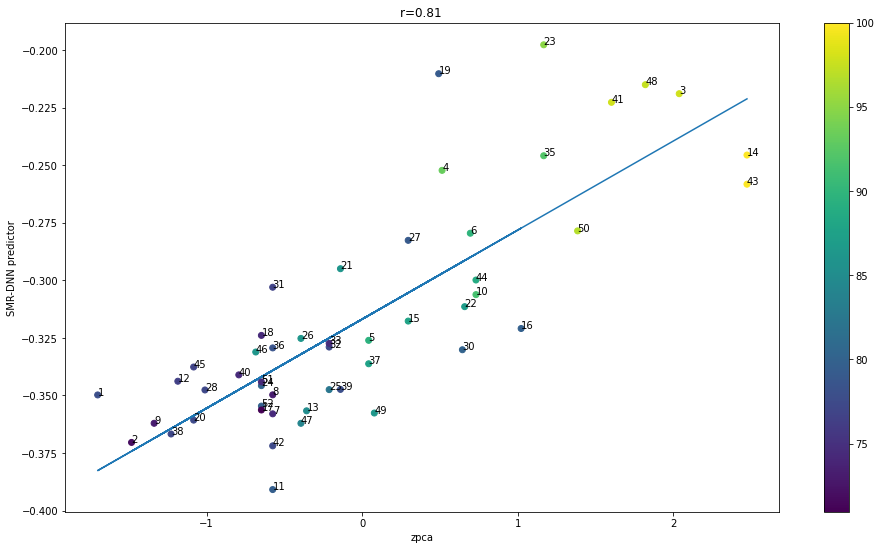

In [ ]:
indx = loadmat('Means_giga_mayo.mat')['S1'].ravel()

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler

scm = MinMaxScaler()
indx = loadmat('Means_giga_mayo.mat')['S1'].ravel()
print('mean_squared_error', np.sqrt(mean_squared_error(scm.fit_transform(zpca), scm.fit_transform(ypred))))
print('mean_absolute_error', mean_absolute_error(scm.fit_transform(zpca), scm.fit_transform(ypred)))
print('mean_absolute_percentage_error', mean_absolute_error(scm.fit_transform(zpca), scm.fit_transform(ypred))*100)


_, _, r_value, p_value, _ = linregress(zpca.reshape(-1),ypred.reshape(-1))
print( r_value ,p_value )
print(pearsonr(zpca.reshape(-1), ypred.reshape(-1)))
print(spearmanr(zpca.reshape(-1), ypred.reshape(-1)))

regr = linear_model.LinearRegression()
regr.fit(zpca.reshape(-1,1),ypred.reshape(-1,1))
lrpred = regr.predict(zpca.reshape(-1,1))
plt.figure(figsize=(16,9))
plt.plot(zpca,-1*lrpred)
plt.scatter(zpca,-1*ypred,c=acc_m)
for i in range(zpca.shape[0]):
    plt.text(zpca[i],-1*ypred[i],indx[i])
plt.xlabel('zpca')
plt.ylabel('SMR-DNN predictor')
plt.title('r=%.2f '%abs(r_value))
plt.colorbar()
plt.show()

## por rendimiento de sujeto

In [ ]:
grafos=loadmat('Resultados_new_medidas_grafos_giga_norm_2_v1_.mat')
graf=grafos['Strength']
#crear tensor (sujeto x canales x tiempo)
indx = loadmat('Means_giga_mayo.mat')['S1'].ravel()

#newindx = indx #usar este para no seleccionar tipos
#este segmento es para elegir la casificacion de cada sujeto 
tipos = [2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 1, 1, 1, 1 , 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1]
        
newindx = []
for i in range(len(tipos)):
  if tipos[i]==1 or tipos[i]==1:
    newindx += [indx[i]]
print(len(newindx))

data = loadmat('Data_resting_C3andC4.mat')

mea = data['means']

newmea = []
for i in range(len(tipos)):
  if tipos[i]==1 or tipos[i]==1:
    newmea += [mea[i,:]]
len(newmea)
newmea= np.array(newmea)
print(newmea.shape)
###########################################

xtensor = []
 
for i in newindx:
  if i>= 29 and i<34:
    subjs= graf[i-2,:,:].T
  elif i>=34:
    subjs= graf[i-3,:,:].T
  else:
    subjs= graf[i-1,:,:].T

  try:
    xtensor+=[subjs]
  except:
    print('s'+str(i+1))

xtensor= np.asarray(xtensor)
xtensor.shape


27
(27, 4)


(27, 35, 2)

In [ ]:
## nueva celda, poner en todas
data = loadmat('Data_resting_C3andC4.mat')


# newmea = []
# for i in range(len(tipos)):
#   if tipos[i]==0 or tipos[i]==2:
#     newmea+= [mea[i,:]]
# len(newmea)
# newmea= np.array(newmea)


mea = newmea#data['means']
sc_ma = StandardScaler()
acc_m = mea.mean(axis=1)

ma_z = sc_ma.fit_transform(mea)
 
zpca = ma_z[:,3].reshape(-1,1)
zpca.shape

(27, 1)

In [ ]:
a=xtensor
steps = [('smrfeat', SMRfeat()), 
          ('smrdnn', SMRDNN(verbose=1,epochs=200,l1_param=1e-3,l2_param=1e-3,validation_split=0.1))]

pipeline = Pipeline(steps)
#ypred = pipeline.fit_predict(X_raw,zpca)
ypred = cross_val_predict(pipeline,a,zpca,cv=LeaveOneOut(),verbose=10,n_jobs=-1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   13.9s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   22.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   45.6s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:  1.9min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:  1.9min finished


mean_squared_error 0.4716945274433253
mean_absolute_error 0.37232253061547693
mean_absolute_percentage_error 37.232253061547695
-0.732604861689972 1.3929575117423205e-05


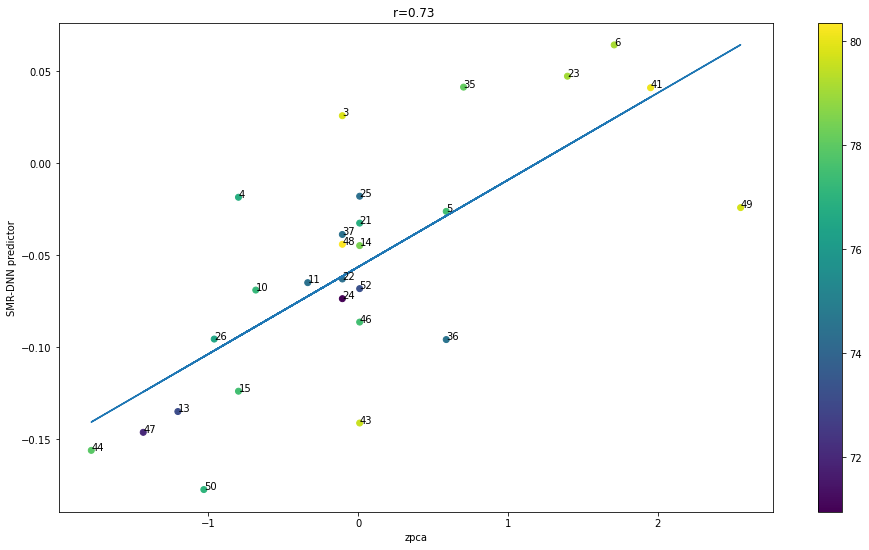

In [ ]:
indx = loadmat('Means_giga_mayo.mat')['S1'].ravel()
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler

scm = MinMaxScaler()
print('mean_squared_error', np.sqrt(mean_squared_error(scm.fit_transform(zpca), scm.fit_transform(ypred))))
print('mean_absolute_error', mean_absolute_error(scm.fit_transform(zpca), scm.fit_transform(ypred)))
print('mean_absolute_percentage_error', mean_absolute_error(scm.fit_transform(zpca), scm.fit_transform(ypred))*100)

_, _, r_value, p_value, _ = linregress(zpca.reshape(-1),ypred.reshape(-1))
print( r_value ,p_value )

regr = linear_model.LinearRegression()
regr.fit(zpca.reshape(-1,1),ypred.reshape(-1,1))
lrpred = regr.predict(zpca.reshape(-1,1))
plt.figure(figsize=(16,9))
plt.plot(zpca,-1*lrpred)
plt.scatter(zpca,-1*ypred,c=acc_m)
for i in range(zpca.shape[0]):
    plt.text(zpca[i],-1*ypred[i],indx[i])
plt.xlabel('zpca')
plt.ylabel('SMR-DNN predictor')
plt.title('r=%.2f '%abs(r_value))
plt.colorbar()
plt.show()

# Todos los grafos


In [ ]:
grafos=loadmat('Resultados_new_medidas_grafos_giga_norm_2_v1_.mat')

In [ ]:
graf=grafos['Clustering']
#crear tensor (sujeto x canales x tiempo)
indx = loadmat('Means_giga_mayo.mat')['S1'].ravel()
tipos = [2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 1, 1, 1, 1 , 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1]
newindx = indx #usar este para no seleccionar tipos
# newindx = []
# for i in range(len(tipos)):
#   if tipos[i]==2 or tipos[i]==0:
#     newindx += [indx[i]]


xtensor = []
 
for i in newindx:
  if i>= 29 and i<34:
    subjs= graf[i-2,:,:].T
  elif i>=34:
    subjs= graf[i-3,:,:].T
  else:
    subjs= graf[i-1,:,:].T

  try:
    xtensor+=[subjs]
  except:
    print('s'+str(i+1))

xtensor= np.expand_dims(xtensor, axis=3)
clust=xtensor
clust.shape


(50, 35, 2, 1)

In [ ]:
graf=grafos['Global_Eff']
#crear tensor (sujeto x canales x tiempo)
indx = loadmat('Means_giga_mayo.mat')['S1'].ravel()
tipos = [2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 1, 1, 1, 1 , 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1]
newindx = indx #usar este para no seleccionar tipos
# newindx = []
# for i in range(len(tipos)):
#   if tipos[i]==2 or tipos[i]==0:
#     newindx += [indx[i]]


xtensor = []
 
for i in newindx:
  if i>= 29 and i<34:
    subjs= graf[i-2,:,:].T
  elif i>=34:
    subjs= graf[i-3,:,:].T
  else:
    subjs= graf[i-1,:,:].T

  try:
    xtensor+=[subjs]
  except:
    print('s'+str(i+1))

xtensor= np.expand_dims(xtensor, axis=3)
glob = xtensor
glob.shape

(50, 35, 2, 1)

In [ ]:
graf=grafos['Path_Len']
#crear tensor (sujeto x canales x tiempo)
indx = loadmat('Means_giga_mayo.mat')['S1'].ravel()
tipos = [2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 1, 1, 1, 1 , 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1]
newindx = indx #usar este para no seleccionar tipos
# newindx = []
# for i in range(len(tipos)):
#   if tipos[i]==2 or tipos[i]==0:
#     newindx += [indx[i]]


xtensor = []
 
for i in newindx:
  if i>= 29 and i<34:
    subjs= graf[i-2,:,:].T
  elif i>=34:
    subjs= graf[i-3,:,:].T
  else:
    subjs= graf[i-1,:,:].T

  try:
    xtensor+=[subjs]
  except:
    print('s'+str(i+1))

xtensor= np.expand_dims(xtensor, axis=3)
path =xtensor
path.shape

(50, 35, 2, 1)

In [ ]:
graf=grafos['Strength']
#crear tensor (sujeto x canales x tiempo)
indx = loadmat('Means_giga_mayo.mat')['S1'].ravel()
tipos = [2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 1, 1, 1, 1 , 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1]
newindx = indx #usar este para no seleccionar tipos
# newindx = []
# for i in range(len(tipos)):
#   if tipos[i]==2 or tipos[i]==0:
#     newindx += [indx[i]]


xtensor = []
 
for i in newindx:
  if i>= 29 and i<34:
    subjs= graf[i-2,:,:].T
  elif i>=34:
    subjs= graf[i-3,:,:].T
  else:
    subjs= graf[i-1,:,:].T

  try:
    xtensor+=[subjs]
  except:
    print('s'+str(i+1))

xtensor= np.asarray(xtensor)
stren =np.expand_dims(xtensor, axis=3)
stren.shape


(50, 35, 2, 1)

In [ ]:
 all_graf= np.concatenate([clust, glob, path, stren], axis=3)
 all_graf.shape

(50, 35, 2, 4)

In [ ]:
class SMRfeatmultiple(BaseEstimator, TransformerMixin):
  def __init__(self):
    self

  def scalerlist(self,Xfull):
     self.scaler = len(Xfull)*[None]
     for i in range(len(Xfull)):
        self.scaler[i] = StandardScaler()
        Xfull[i] = self.scaler[i].fit_transform(Xfull[i])
     return Xfull


  def fit(self,Xepochs,*_):
      
      Xtmp = [Xepochs[:,:,:,i] for i in range(Xepochs.shape[3])]
      Xfull = []
      for j in range(len(Xtmp)):
         Xfull+= [Xtmp[j][:,:,i] for i in range(Xtmp[j].shape[2])]
         
      self.scalerlist(Xfull)
      return 

  def transform(self,Xepochs,*_):        
          
      
      Xtmp = [Xepochs[:,:,:,i] for i in range(Xepochs.shape[3])]
      Xfull = []
      for j in range(len(Xtmp)):
         Xfull+= [Xtmp[j][:,:,i] for i in range(Xtmp[j].shape[2])]

      
      for i in range(len(Xfull)):
         self.scaler[i] = StandardScaler()
         Xfull[i] = self.scaler[i].fit_transform(Xfull[i])
      return Xfull

  def fit_transform(self,Xepochs,*_):

      self.fit(Xepochs)
      return self.transform(Xepochs)   

In [ ]:
estimator = SMRfeatmultiple()
XX= estimator.fit_transform(all_graf)

In [ ]:
len(XX)
XX[7].shape

(50, 35)

In [ ]:
## nueva celda, poner en todas
data = loadmat('Data_resting_C3andC4.mat')

mea = data['means']
sc_ma = StandardScaler()
acc_m = mea.mean(axis=1)

ma_z = sc_ma.fit_transform(mea)
 
zpca = ma_z[:,3].reshape(-1,1)

In [ ]:
a=all_graf
steps = [('smrfeat', SMRfeatmultiple()), 
          ('smrdnn', SMRDNN(verbose=1,epochs=200,l1_param=1e-3,l2_param=1e-3,validation_split=0.1))]

pipeline = Pipeline(steps)
#ypred = pipeline.fit_predict(X_raw,zpca)
ypred = cross_val_predict(pipeline,a,zpca,cv=LeaveOneOut(),verbose=10,n_jobs=-1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   21.0s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   31.1s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  4.4min finished


mean_squared_error 0.48059502822106925
mean_absolute_error 0.4037117841430333
mean_absolute_percentage_error 40.37117841430333
-0.7408025542131396


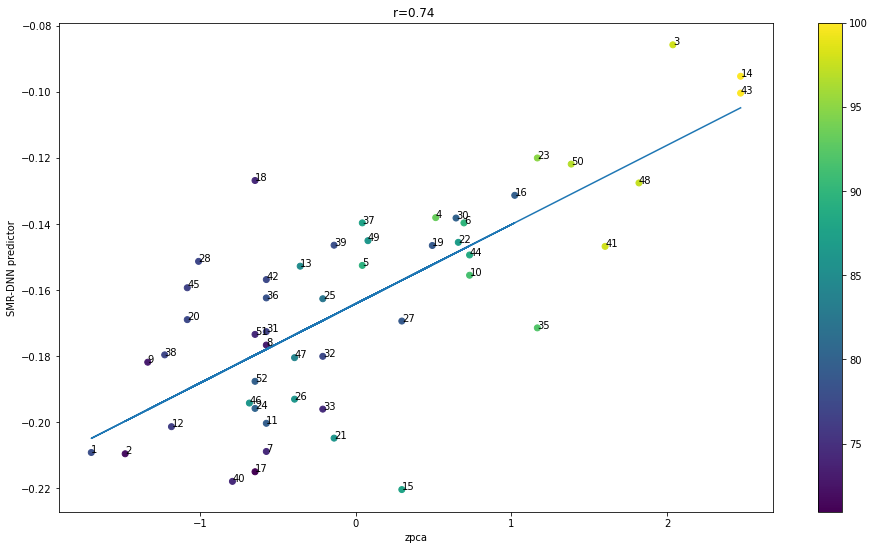

In [ ]:
indx = loadmat('Means_giga_mayo.mat')['S1'].ravel()

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler

scm = MinMaxScaler()
indx = loadmat('Means_giga_mayo.mat')['S1'].ravel()
print('mean_squared_error', np.sqrt(mean_squared_error(scm.fit_transform(zpca), scm.fit_transform(ypred))))
print('mean_absolute_error', mean_absolute_error(scm.fit_transform(zpca), scm.fit_transform(ypred)))
print('mean_absolute_percentage_error', mean_absolute_error(scm.fit_transform(zpca), scm.fit_transform(ypred))*100)
_, _, r_value, p_value, _ = linregress(zpca.reshape(-1),ypred.reshape(-1))
print(r_value)
regr = linear_model.LinearRegression()
regr.fit(zpca.reshape(-1,1),ypred.reshape(-1,1))
lrpred = regr.predict(zpca.reshape(-1,1))
plt.figure(figsize=(16,9))
plt.plot(zpca,-1*lrpred)
plt.scatter(zpca,-1*ypred,c=acc_m)
for i in range(zpca.shape[0]):
    plt.text(zpca[i],-1*ypred[i],indx[i])
plt.xlabel('zpca')
plt.ylabel('SMR-DNN predictor')
plt.title('r=%.2f '%abs(r_value))
plt.colorbar()
plt.show()

## todos los grafos montecarlo


In [ ]:
def split_loo(X,y,indx):
    X_test = np.expand_dims(X[indx,:,:],axis=0)
    y_test = y[indx,:]
    X_train = np.delete(X,indx,axis=0)
    y_train = np.delete(y,indx,axis=0)
    return X_train,y_train,X_test,y_test

def fit_predict_Mc_dropout(X,y,verbose=True):
    y_pred = X.shape[0]*[None]
    t = 0
    for i in range(X.shape[0]):
        ti = time()

        X_train,y_train,X_test,y_test = split_loo(X,y,i)
        
        mdl = Pipeline([
            ('Feats',SMRfeat()),
            ('SRMDNN',SMRDNN(verbose=0,epochs=200,l1_param=1e-3,l2_param=1e-3,validation_split=0.1,alpha_dropout=False))
        ])

        mdl.fit(X_train,y_train)
        y_pred[i] = mdl.predict(X_test).ravel()

        te = time()
        t+=te-ti
        if verbose:
            print("iter: "+str(i+1)+" of "+str(X.shape[0])+" ====> elapsed time: "+str((te-ti)/60)+" min")
    
    print("\nTotal time = "+str(t/60)+" min")

    y_pred = np.asarray(y_pred)
    return y_pred
def plot_regression(y,y_pred):
    scm = MinMaxScaler()

    ypred = np.mean(y_pred,axis=1).reshape(-1,1)
    std_y = np.std(scm.fit_transform(y_pred),axis=1)

    XX = scm.fit_transform(y)
    YY = scm.fit_transform(-ypred)
    
    _, _, r_value, p_value, _ = linregress(XX.reshape(-1),YY.reshape(-1))

    indx = loadmat('Means_giga_mayo.mat')['S1'].ravel()

    regr = linear_model.LinearRegression()
    regr.fit(XX.reshape(-1,1),YY.reshape(-1,1))
    lrpred = regr.predict(XX.reshape(-1,1))
    #plt.figure(figsize=(16,9))
    #xx = np.linspace(XX.min(),XX.max(),XX.shape[0])
    #yy = np.linspace(YY.min(),YY.max(),XX.shape[0])
    #plt.plot(xx,yy)
    #plt.fill_between(xx.ravel(),yy.ravel()+0.95*std_y,yy.ravel()-0.95*std_y,color="b",alpha=0.2)
    #plt.scatter(XX,YY,c=acc_m)

    #for i in range(XX.shape[0]):
    #    plt.text(XX[i],YY[i],indx[i])
    #plt.xlabel('Accuracy')
    #plt.ylabel('FCx Predictor')
    #plt.title('r=%.2f '%abs(r_value))
    #plt.colorbar()
    #plt.show()

    print('r_value', abs(r_value))
    print('p_value',p_value)
    print('mean_squared_error', np.sqrt(mean_squared_error(XX,YY)))
    print('mean_absolute_error', mean_absolute_error(XX,YY))
    
    return abs(r_value),p_value,np.sqrt(mean_squared_error(XX,YY)),mean_absolute_error(XX,YY)